<a href="https://colab.research.google.com/github/selimunal/Pytorch/blob/main/PyTorch_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#load the data
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target.shape

(569,)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.3)

In [ ]:
N,D=X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scale the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#Build the model
model=nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [ ]:
#loss and optimizer
criterion=nn.BCELoss()
#criterion=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(model.parameters())

In [ ]:
#convert the data to torch tensors
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32)).reshape(-1,1)
y_test=torch.from_numpy(y_test.astype(np.float32)).reshape(-1,1)

In [ ]:
#train the model
n_epochs=1000

#stuff to store
train_losses=np.zeros(n_epochs)
test_losses=np.zeros(n_epochs)
train_acc=np.zeros(n_epochs)
test_acc=np.zeros(n_epochs)

In [ ]:
for it in range(n_epochs):
  #zero the parameter gradients
  optimizer.zero_grad()

  #forward pass
  outputs=model(X_train)
  loss=criterion(outputs,y_train)
  

  #backward and optimize
  loss.backward()
  optimizer.step()

  #get test loss
  outputs_test=model(X_test)
  loss_test=criterion(outputs_test,y_test)

  train_losses[it]=loss.item()
  test_losses[it]=loss_test.item()

  with torch.no_grad():
    p_train=model(X_train)
    # p_train=np.round(p_train.numpy())
    p_train=(p_train.numpy()>0)
    acctrain=np.mean(y_train.numpy()==p_train)

    p_test=model(X_test)
    #p_test=np.round(p_test.numpy())
    p_test=(p_test.numpy()>0)
    acctest=np.mean(y_test.numpy()==p_test)

    train_acc[it]=acctrain.item()
    test_acc[it]=acctest.item()

  if (it+1) % 50==0:
    print(f'Epoch {it+1}/{n_epochs}, Train loss: {loss.item():.4f},Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train loss: 0.4670,Test Loss: 0.4605
Epoch 100/1000, Train loss: 0.3433,Test Loss: 0.3501
Epoch 150/1000, Train loss: 0.2762,Test Loss: 0.2910
Epoch 200/1000, Train loss: 0.2329,Test Loss: 0.2541
Epoch 250/1000, Train loss: 0.2026,Test Loss: 0.2288
Epoch 300/1000, Train loss: 0.1802,Test Loss: 0.2105
Epoch 350/1000, Train loss: 0.1630,Test Loss: 0.1967
Epoch 400/1000, Train loss: 0.1494,Test Loss: 0.1859
Epoch 450/1000, Train loss: 0.1384,Test Loss: 0.1773
Epoch 500/1000, Train loss: 0.1293,Test Loss: 0.1702
Epoch 550/1000, Train loss: 0.1217,Test Loss: 0.1644
Epoch 600/1000, Train loss: 0.1152,Test Loss: 0.1594
Epoch 650/1000, Train loss: 0.1096,Test Loss: 0.1552
Epoch 700/1000, Train loss: 0.1047,Test Loss: 0.1516
Epoch 750/1000, Train loss: 0.1004,Test Loss: 0.1484
Epoch 800/1000, Train loss: 0.0965,Test Loss: 0.1456
Epoch 850/1000, Train loss: 0.0931,Test Loss: 0.1431
Epoch 900/1000, Train loss: 0.0900,Test Loss: 0.1409
Epoch 950/1000, Train loss: 0.0873,Test Loss: 0

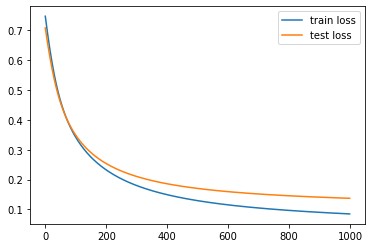

In [ ]:
#loss per iteration
plt.plot(train_losses,label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

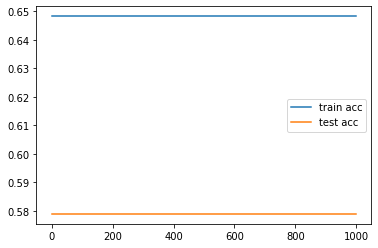

In [ ]:
#accuracy per iteration
plt.plot(train_acc,label='train acc')
plt.plot(test_acc, label='test acc')
plt.legend()
plt.show()

In [ ]:
# #get accouracy
# with torch.no_grad():
#   p_train=model(X_train)
#   p_train=np.round(p_train.numpy())
#   train_acc=np.mean(y_train.numpy()==p_train)

#   p_test=model(X_test)
#   p_test=np.round(p_test.numpy())
#   test_acc=np.mean(y_test.numpy()==p_test)

# print(f'Train acc: {train_acc:.4f},Test acc: {test_acc:.4f}')

In [ ]:
# for it in range(n_epochs):
#   with torch.no_grad():
#     p_train=model(X_train)
#     p_train=np.round(p_train.numpy())
#     acctrain=np.mean(y_train.numpy()==p_train)

#     p_test=model(X_test)
#     p_test=np.round(p_test.numpy())
#     acctest=np.mean(y_test.numpy()==p_test)

    

#     if (it+1) % 50==0:
#       print(f'Epoch {it+1}/{n_epochs}, Train acc: {acctrain.item():.4f},Test acc: {acctest.item():.4f}')

In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2481, -0.4760, -0.4479, -0.3200, -0.1221, -0.1865, -0.2197, -0.4600,
                       -0.2523,  0.4463, -0.1983,  0.1308, -0.3137, -0.2477, -0.2633, -0.0936,
                        0.1751, -0.0544,  0.3309,  0.2893, -0.3643, -0.4801, -0.3230, -0.5308,
                       -0.3071, -0.1181, -0.4554, -0.3368, -0.3945, -0.3232]])),
             ('0.bias', tensor([0.6150]))])

In [ ]:
#save the model
torch.save(model.state_dict(),'mymodel.pt')

In [ ]:
ls

mymodel.pt  sample_data/


In [ ]:
model2=nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [ ]:
# model2.load_state_dict(torch.load('mymodel.pt'))

In [ ]:
# from google.colab import files
# files.download('mymodel.pt')